In [1]:
import distribution_test as dt
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import numpy as np
import pandas as pd

In [29]:
with open('../../postprocessing/representation.npy', 'rb') as f:
    rep = np.load(f)
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rep)
rep_scaled = scaler.transform(rep)
rep = rep_scaled

print(np.mean(rep, axis=1))
print(np.std(rep, axis=1))
    
df = pd.read_csv('../../dataset/m_test.csv')
print(df.columns.values)

[-0.1312   0.04068 -0.08057 ... -0.1119  -0.0376   0.04712]
[0.5957 0.739  0.4038 ... 0.4766 0.3733 0.7104]
['object_id' 'photoz' 'petroR90_r' 'r_cmodel_mag_ge' 'g_cmodel_mag_ge'
 'i_cmodel_mag_ge' 'z_cmodel_mag_ge' 'image_path' 'petro_half_light'
 'petro_90_light' 'dataset' 'snapshot_id' 'subhalo_id'
 'root_descendant_id' 'lookback' 'z' 'stellar_age_2rhalf_lumw'
 'fraction_disk_stars' 'stellar_mass' 'mass_in_rad' 'mass_exsitu'
 'half_mass_rad_physical' 'snap_num_last_maj_merger'
 'mass_last_maj_merger' 'mean_merger_lookback_time'
 'mean_merger_mass_ratio' 'color' 'i_band_mag_dust_apparent' 'mass'
 'lookback_time_last_maj_merger' 'exsitu']


In [30]:
indices_HSC = np.argwhere((df['dataset'] == 'HSC').to_numpy())[:,0]
indices_TNG100 = np.argwhere((df['dataset'] == 'HSC_TNG100').to_numpy())[:,0]

#first_rep = rep[0]
#first_df = df.iloc[0]

#print(first_rep)
#print(first_df)

np.random.shuffle(indices_HSC)
np.random.shuffle(indices_TNG100)

split_indices_HSC = np.array_split(indices_HSC, 2)
split_indices_TNG100 = np.array_split(indices_TNG100, 2)

x_list = [rep[split_indices_HSC[0]], rep[split_indices_HSC[1]], rep[split_indices_TNG100[0]], rep[split_indices_TNG100[1]]]
df_list = [df.iloc[split_indices_HSC[0]], df.iloc[split_indices_HSC[1]], df.iloc[split_indices_TNG100[0]], df.iloc[split_indices_TNG100[1]]]

x_list, df_list = dt.DistributionTest.reshape_inputs(x_list,df_list)
rep_HSC_0 = x_list[0]
rep_HSC_1 = x_list[1]
rep_TNG100_0 = x_list[2]
rep_TNG100_1 = x_list[3]
df_HSC_0 = df_list[0]
df_HSC_1 = df_list[1]
df_TNG100_0 = df_list[2]
df_TNG100_1 = df_list[3]

x_list = [rep_scaled[split_indices_HSC[0]], rep_scaled[split_indices_HSC[1]], rep_scaled[split_indices_TNG100[0]], rep_scaled[split_indices_TNG100[1]]]
df_list = [df.iloc[split_indices_HSC[0]], df.iloc[split_indices_HSC[1]], df.iloc[split_indices_TNG100[0]], df.iloc[split_indices_TNG100[1]]]

x_list, df_list = dt.DistributionTest.reshape_inputs(x_list,df_list)
rep_scaled_HSC_0 = x_list[0]
rep_scaled_HSC_1 = x_list[1]
rep_scaled_TNG100_0 = x_list[2]
rep_scaled_TNG100_1 = x_list[3]
df_HSC_0 = df_list[0]
df_HSC_1 = df_list[1]
df_TNG100_0 = df_list[2]
df_TNG100_1 = df_list[3]

#print(np.sum(df_HSC_1['object_id'] == 40168200599522096.0))
#print(rep_HSC_1[df_HSC_1['object_id'] == 40168200599522096.0])

assert rep_HSC_0.shape[0] == len(df_HSC_0)
assert rep_HSC_1.shape[0] == len(df_HSC_1)
assert rep_TNG100_0.shape[0] == len(df_TNG100_0)
assert rep_TNG100_1.shape[0] == len(df_TNG100_1)

In [5]:
mndd = dt.MeanNormalizedNeighborDistance(rep_TNG100_0, n_neighbor=8, p=1)
measure_HSC = mndd.get_normalized_neighbor_distances(rep_HSC_0)
measure_TNG = mndd.get_normalized_neighbor_distances(rep_TNG100_1)

mndd = dt.MeanNormalizedNeighborDistance(rep_scaled_TNG100_0, n_neighbor=8, p=1)
measure_scaled_HSC = mndd.get_normalized_neighbor_distances(rep_scaled_HSC_0)
measure_scaled_TNG = mndd.get_normalized_neighbor_distances(rep_scaled_TNG100_1)

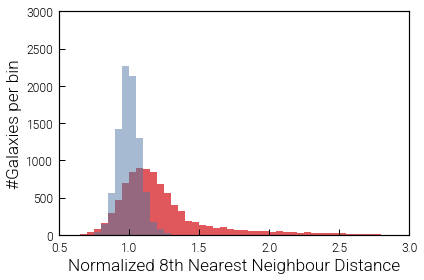

In [7]:
plt.hist(measure_HSC, bins=50, range=[0.5,3.0])
plt.hist(measure_TNG, bins=50, range=[0.5,3.0], alpha = 0.5)
plt.xlim(0.5,3.0)
plt.ylim(0, 3000)
plt.xlabel('Normalized 8th Nearest Neighbour Distance')
plt.ylabel('#Galaxies per bin')
plt.show()

max_HSC = np.max(measure_HSC)
min_HSC = np.min(measure_HSC)

mean_TNG = np.mean(measure_TNG)
std_TNG = np.std(measure_TNG)
lower_TNG = mean_TNG - std_TNG
upper_TNG = mean_TNG + std_TNG

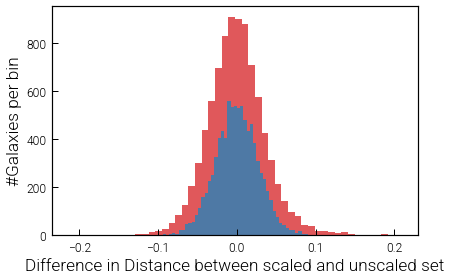

-0.0005327404913396917
0.03534973106814392


In [8]:
diff_HSC = (measure_HSC-measure_scaled_HSC)
diff_TNG = (measure_TNG-measure_scaled_TNG)
plt.hist(diff_HSC, bins=50)
plt.hist(diff_TNG, bins=50)
plt.xlabel('Difference in Distance between scaled and unscaled set')
plt.ylabel('#Galaxies per bin')
plt.show()

print(np.mean(diff_HSC))
print(np.std(diff_HSC))

[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: object_id, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: photoz, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: petroR90_r, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: r_cmodel_mag_ge, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: g_cmodel_mag_ge, Length: 8710, dtype: float64] contains non-finite values.
[0   

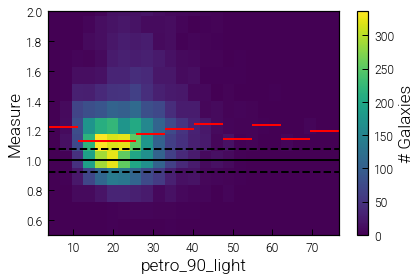

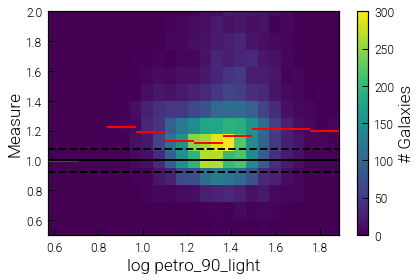

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


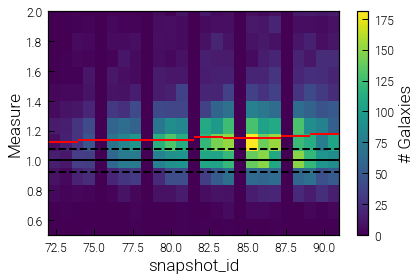

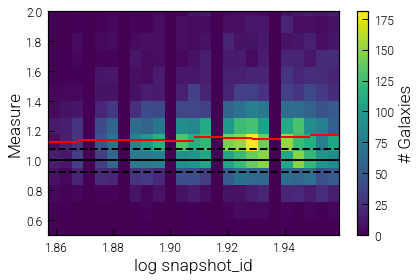

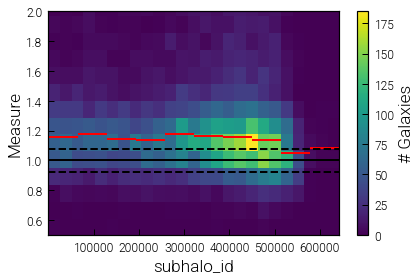

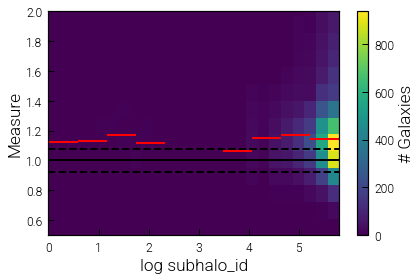

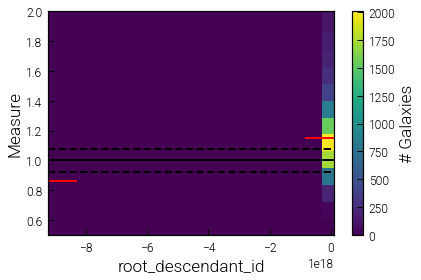

[0       16.000000
1       16.698970
2       16.845098
3       16.903090
4       16.903090
          ...    
8705    16.845098
8706    16.698970
8707    16.000000
8708    16.903090
8709     7.329712
Name: root_descendant_id, Length: 8710, dtype: float64] contains non-finite values.


/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


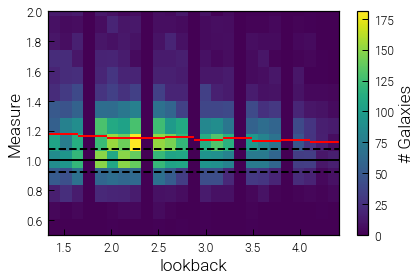

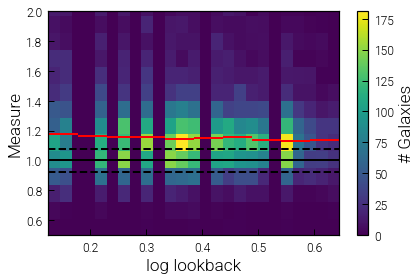

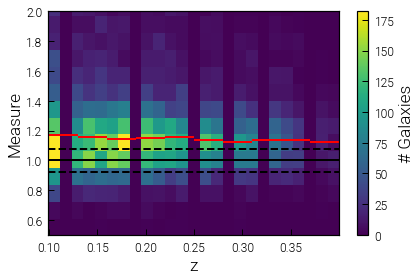

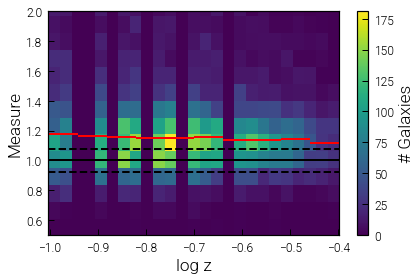

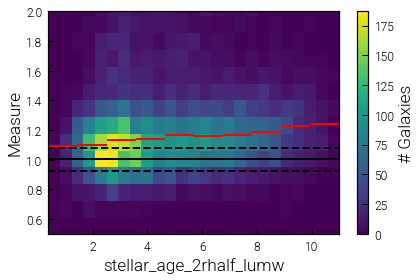

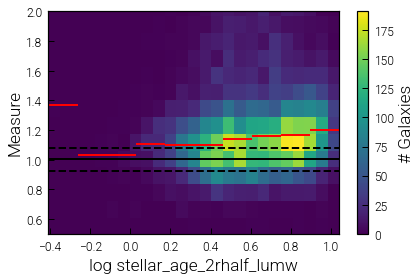

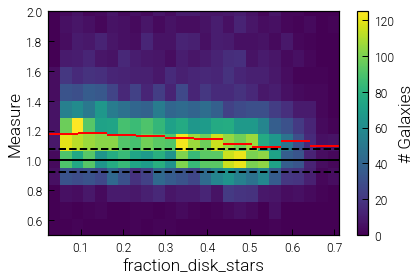

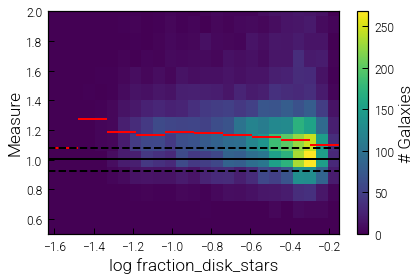

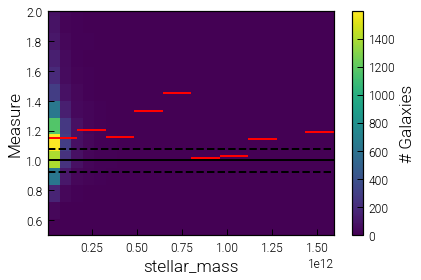

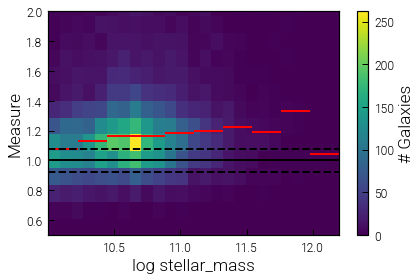

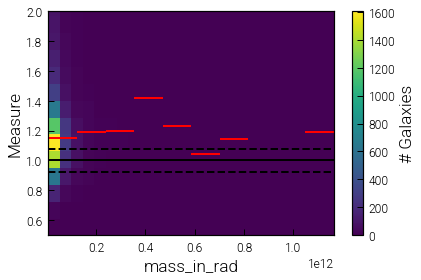

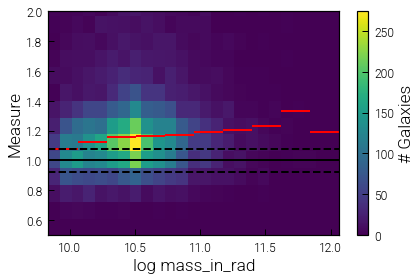

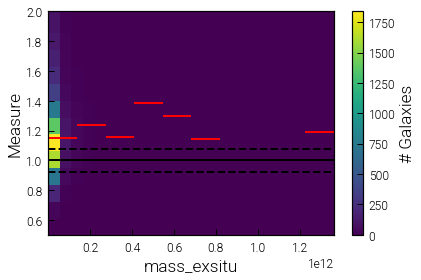

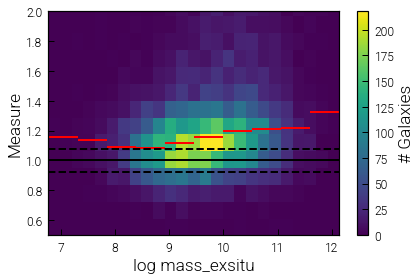

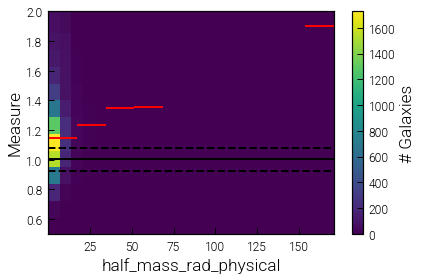

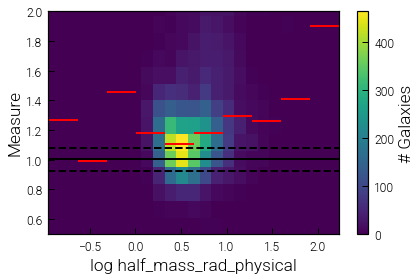

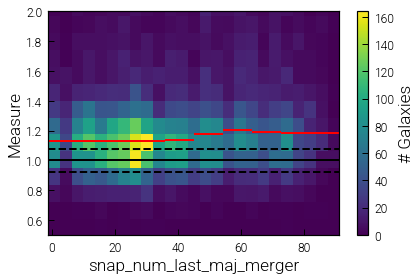

[0       1.041393
1       1.255273
2       1.518514
3       1.732394
4       1.812913
          ...   
8705    1.568202
8706    1.568202
8707    1.875061
8708    1.531479
8709    1.778151
Name: snap_num_last_maj_merger, Length: 8710, dtype: float64] contains non-finite values.


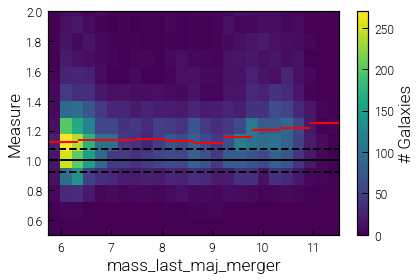

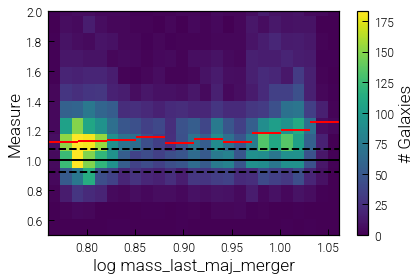

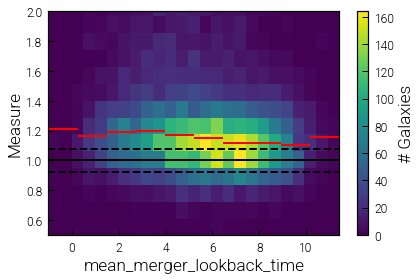

[0      -0.078477
1       0.607239
2       0.903786
3       0.826407
4       0.626075
          ...   
8705    0.875079
8706    0.892693
8707    0.672611
8708    0.906486
8709    0.655753
Name: mean_merger_lookback_time, Length: 8710, dtype: float64] contains non-finite values.


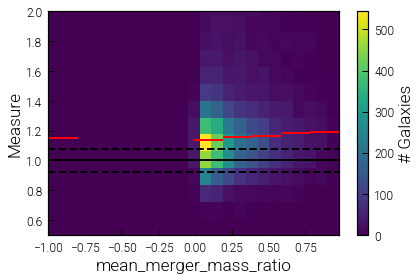

[0      -1.038611
1      -0.805767
2      -0.313149
3      -1.029030
4      -0.492714
          ...   
8705   -0.962165
8706   -0.556616
8707   -0.324421
8708   -0.457224
8709   -0.122105
Name: mean_merger_mass_ratio, Length: 8710, dtype: float64] contains non-finite values.


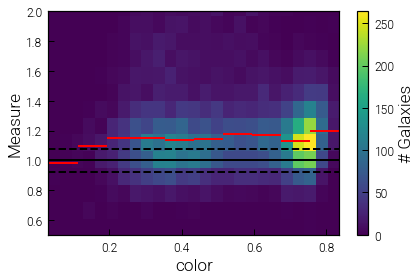

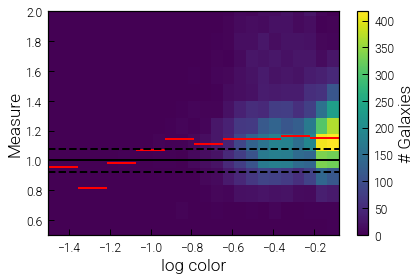

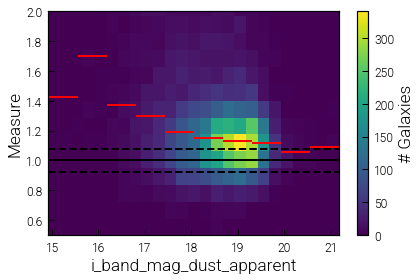

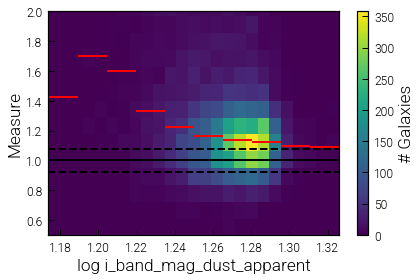

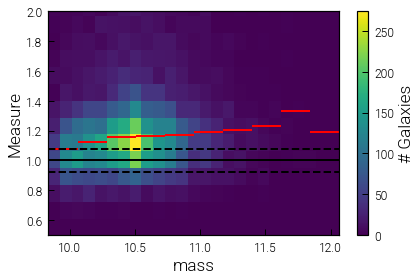

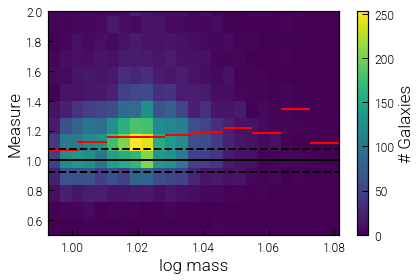

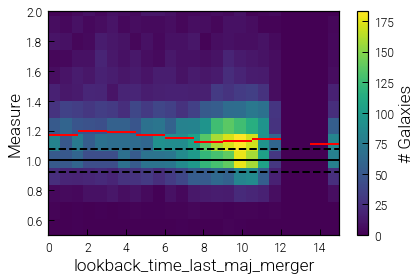

[0       1.031097
1       0.949295
2       0.931342
3       0.749749
4       0.608168
          ...   
8705    0.870380
8706    0.888258
8707   -0.156677
8708    0.896184
8709    0.435921
Name: lookback_time_last_maj_merger, Length: 8710, dtype: float64] contains non-finite values.


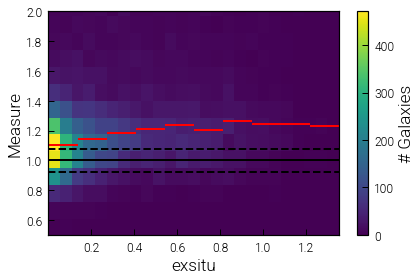

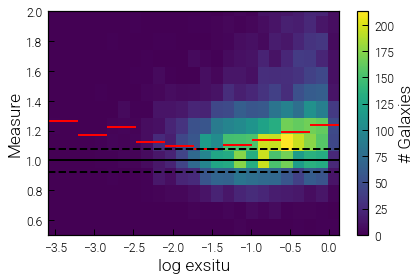

In [9]:
for label in df.columns.values:
    try:
        
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df_TNG100_0[label], measure_HSC, statistic='median', bins=10)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.hist2d(df_TNG100_0[label], measure_HSC, bins=25)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [mean_TNG, mean_TNG], 'k', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [lower_TNG, lower_TNG], 'k--', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [upper_TNG, upper_TNG], 'k--', lw=2)
        plt.colorbar(label='# Galaxies')
        plt.xlabel(label)
        plt.ylabel('Measure')
        plt.ylim(0.5, 2)
        plt.show()
        
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(np.log10(df_TNG100_0[label]), measure_HSC, statistic='median', bins=10)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.hist2d(np.log10(df_TNG100_0[label]), measure_HSC, bins=25)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [mean_TNG, mean_TNG], 'k', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [lower_TNG, lower_TNG], 'k--', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [upper_TNG, upper_TNG], 'k--', lw=2)
        plt.colorbar(label='# Galaxies')
        plt.xlabel('log ' + label)
        plt.ylabel('Measure')
        plt.ylim(0.5, 2)
        plt.show()
        
    except Exception as e:
        print(e)

from scipy import stats

for label in df.columns.values:
    try:
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df_TNG100_0[label], measure_HSC, statistic='mean', bins=10)
        
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.title(label)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='g', lw=2)
        #plt.ylim(0,0.4)
        plt.show()
        
    except:
        pass

In [10]:
q = np.arange(0.0,1,0.25)
quantiles = np.quantile(measure_HSC, q)
classes = np.digitize(measure_HSC, quantiles)

<AxesSubplot:xlabel='mass', ylabel='classes'>

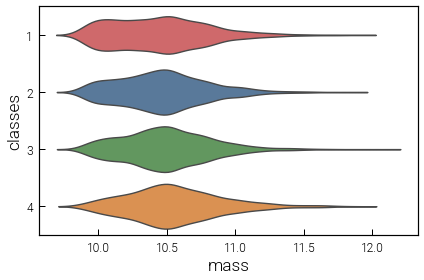

In [11]:
import seaborn as sns
d = {'classes': classes, 'deviations': measure_HSC, 'mass': df_TNG100_0['mass'], 'z': df_TNG100_0['z'], 'color': df_TNG100_0['color'], 'fraction_disk_stars': df_TNG100_0['fraction_disk_stars'], 'petro_90_light': df_TNG100_0['petro_90_light']}
d = pd.DataFrame(d)
sns.violinplot(data=d, x="mass", y="classes", inner=None, orient='h', scale='area')

In [12]:
import umap

#Set seed
SEED = 0

#Plot a single UMAP of x with color c
def create_umap(x, n_neighbors=50, min_dist=0.1, n_components=2, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        densmap=False,
        random_state=SEED
    )
    model = fit.fit(x)
    
    return model

In [13]:
model = create_umap(rep, n_neighbors=100, min_dist=0.5)
u = model.transform(rep_TNG100_0)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


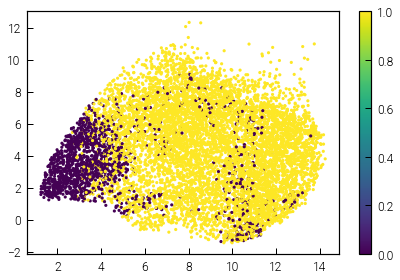

In [14]:
plt.scatter(u[:,0], u[:,1], s=10, c=measure_HSC<1.4)
plt.colorbar()
plt.show()

In [15]:
mndd = dt.MeanNormalizedNeighborDistance(rep_HSC_0, n_neighbor=8, p=1)
measure_TNG = mndd.get_normalized_neighbor_distances(rep_TNG100_0)

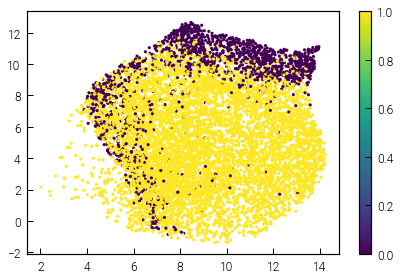

In [16]:
u = model.transform(rep_HSC_0)
plt.scatter(u[:,0], u[:,1], s=10, c=measure_TNG<1.4)
plt.colorbar()
plt.show()

In [31]:
mndd = dt.MeanNormalizedNeighborDistance(rep_TNG100_0, n_neighbor=8, p=1)
measure = mndd.get_normalized_neighbor_distances(rep_HSC_0)

from scipy.spatial import cKDTree
tree = cKDTree(rep_HSC_0, compact_nodes=False, balanced_tree=False)
distance, indexes = tree.query(rep_TNG100_0, k=[1], p=1)
indexes = indexes[:,0]

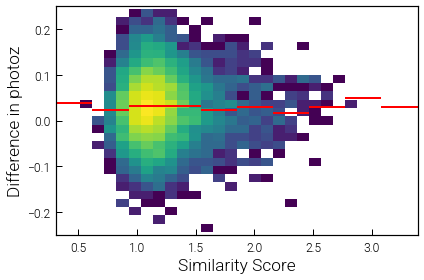

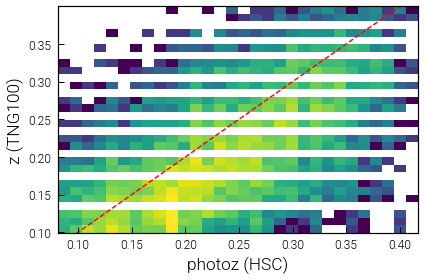

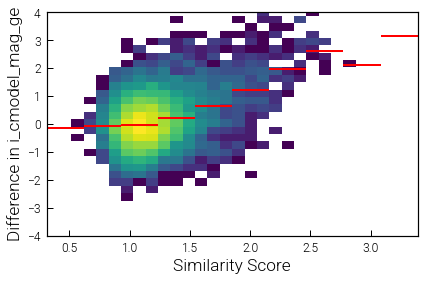

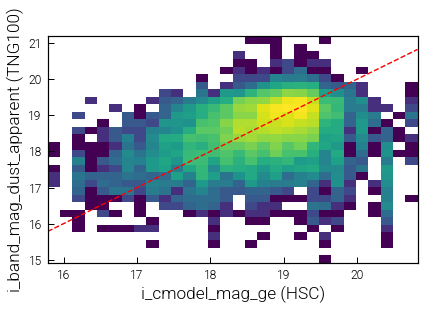

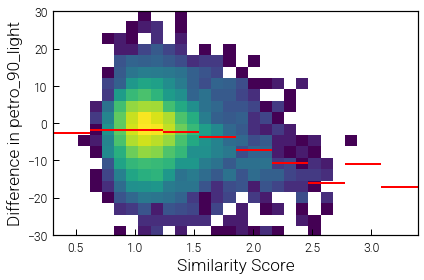

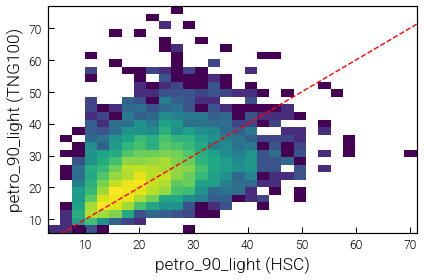

In [34]:
HSC_labels = ['photoz', 'i_cmodel_mag_ge', 'petro_90_light'] 
TNG_labels = ['z', 'i_band_mag_dust_apparent', 'petro_90_light']
limits = [0.25, 4, 30]

for hl, tl, lim in zip(HSC_labels, TNG_labels, limits):

    diff = df_HSC_0.iloc[indexes][hl].to_numpy() - df_TNG100_0[tl].to_numpy()
    plt.hist2d(measure, diff, norm=mpl.colors.LogNorm(), bins=30, cmin=2)
    #plt.scatter(measure, diff, s = 2)
    
    bin_statistic, bin_edges, binnumber = stats.binned_statistic(measure, diff, statistic='mean', bins=10)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
        
    plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
    plt.xlabel('Similarity Score')
    plt.ylabel('Difference in ' + hl)
    plt.ylim(-lim, lim)
    
    plt.show()

    plt.hist2d(df_HSC_0.iloc[indexes][hl].to_numpy(), df_TNG100_0[tl].to_numpy(), norm=mpl.colors.LogNorm(), bins=30)
    min_h = np.min(df_HSC_0.iloc[indexes][hl].to_numpy())
    max_h = np.max(df_HSC_0.iloc[indexes][hl].to_numpy())
    plt.plot([min_h, max_h],[min_h, max_h], 'r--')
    plt.xlabel(hl + ' (HSC)')
    plt.ylabel(tl + ' (TNG100)')
    plt.show()